In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", lambda x: "%.7f" % x)

from model import EMSAR
from model_jax import EMSAR_jax


%load_ext autoreload
%autoreload 2

from experiments import simulate

In [2]:
model = EMSAR()
model2 = EMSAR_jax()

In [50]:
opt_params = {
    "coeffs": np.array([[1.0, -1.0], [1.0, -1.0]]),
    "sigmas": np.array([0.33, 0.67]),
    "rho": np.array(0.9),
}

exp_params = {"n_obs": 200, "p00": 0.7, "p11": 0.7}


sim = simulate(**opt_params, **exp_params)
states, state_exog, exog, endog = sim["args"]
opt_params["state_coeffs"] = sim["state_coeffs"]

In [51]:
opt_params["state_coeffs"].shape

(1, 2)

In [52]:
state_exog.shape, exog.shape, endog.shape

((200, 1), (200, 2), (200, 1))

In [53]:
model.n_obs = len(endog)
n_feat = 2
n_state_feat = 1

init_params = model2._init_params(n_feat, n_state_feat)
# print(coeffs, state_coeffs, rho, sigmas)
# model.hamilton_filter(coeffs, state_coeffs, rho, sigmas, endog, exog, state_exog)
# grad_loss = jit(grad(loss))

In [54]:
init_params["state_coeffs"]

array([[ 0.29132384, -0.43727148]])

In [56]:
model.hamilton_filter(init_params, endog, exog, state_exog)

100%|██████████| 200/200 [00:00<00:00, 4383.08it/s]


309.8351807362968

In [57]:
import jax.numpy as jnp
from jax import grad, jit, vmap

grad_loss = jit(grad(model2.hamilton_filter))

(1, 1) (1, 2)
(200, 1) (1, 2)
(1, 1) (1, 2)
(200, 1) (1, 2)
(1, 1) (1, 2)
(200, 1) (1, 2)
(1, 1) (1, 2)
(200, 1) (1, 2)
(1, 1) (1, 2)
(200, 1) (1, 2)
(1, 1) (1, 2)
(200, 1) (1, 2)
(1, 1) (1, 2)
(200, 1) (1, 2)


2024-04-30 20:11:59.942543: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 3m46.914802s

********************************
[Compiling module jit_jit_update] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


AttributeError: 'list' object has no attribute 'set_xdata'

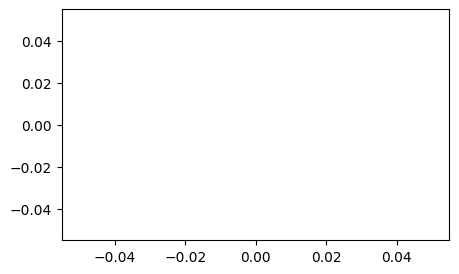

In [46]:
import jaxopt
import jax


solver = jaxopt.LBFGS(fun=model2.hamilton_filter, maxiter=500, tol=1e-8)

# res = solver.run(init_params, endog=endog, exog=exog, state_exog=state_exog)


@jax.jit
def jit_update(params, state):
    return solver.update(params, state, endog=endog, exog=exog, state_exog=state_exog)


params = []
params.append(init_params)

state = solver.init_state(params, endog=endog, exog=exog, state_exog=state_exog)

plt.figure(figsize=(5, 3))
loss_plot = plt.plot([], [])


def update_line(pl, new_x, new_y):
    pl.set_xdata(np.append(pl.get_xdata(), new_x))
    pl.set_ydata(np.append(pl.get_ydata(), new_y))
    plt.draw()


for i in range(500):
    params, state = jit_update(params, state)
    update_line(loss_plot, i, state.value)

In [59]:
state.value

Array(175.6078, dtype=float32)

In [60]:
params

[{'coeffs': Array([[-0.6647899 ,  0.08945924],
         [-0.71921223,  1.6211666 ]], dtype=float32),
  'rho': Array(-0.7819856, dtype=float32),
  'sigmas': Array([0.3543711, 0.2102446], dtype=float32),
  'state_coeffs': Array([[ 0.11718667, -0.30398402]], dtype=float32)}]

In [48]:
opt_params

{'coeffs': array([[ 1., -1.],
        [ 1., -1.]]),
 'sigmas': array([0.33, 0.67]),
 'rho': array(0.9),
 'state_coeffs': array([0.52440051, 0.52440051])}

In [58]:
model2.hamilton_filter(opt_params, endog, exog, state_exog)

(1, 1) (1, 2)
(200, 1) (1, 2)


Array(190.22922, dtype=float32)

In [337]:
coeffs = np.array([[1.0, -1.0], [1.0, -1.0]])
state_coeffs = np.array([[0.0, 0.0], [0.0, 0.0]])
sigmas = np.array([0.33, 0.67])
rho = 0.9
model.hamilton_filter(coeffs, state_coeffs, rho, sigmas, endog, exog, state_exog)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 4060.51it/s]


117.97128486904579

In [328]:
est_states = model.sample_states()

In [332]:
sum(abs(states - est_states)) / model.n_obs

0.245

In [279]:
from scipy import stats
import numpy as np

stats.norm.cdf(np.array([0, 1]))

stats.norm.pdf(np.array([0, 1]), loc=0, scale=[1, 8])

array([0.39894228, 0.04947971])

In [61]:
np.array([[1, 2]]).shape

(1, 2)

In [60]:
np.array([[1, 2], [3, 4]]) * np.array([[1, 2]])

array([[1, 4],
       [3, 8]])

In [10]:
import numpy as np

# illustrate functionality on a 2d array
y = np.array([5, 10, 5, 15, 20, 25, 30, 35, 5, 10, 15, 20]).reshape(2, -1)

In [31]:
np.arange(4, 8).reshape((4, 1))

array([[4],
       [5],
       [6],
       [7]])

In [37]:
a, b = np.arange(4).reshape((2, 2)), np.arange(4, 8).reshape((2, 2))
np.stack([a, b])[1, :, :].shape

(2, 2)

In [48]:
a = np.arange(4).reshape((1, 2, 2))
print(a)
a.reshape((2, 2))

[[[0 1]
  [2 3]]]


array([[0, 1],
       [2, 3]])

In [49]:
type(a)

numpy.ndarray

In [41]:
1 - stats.norm.cdf(1.96)

0.024997895148220484

In [40]:
stats.norm.cdf(-1.96)

0.024997895148220435

In [12]:
def running_view(arr, window, axis=-1):
    """
    return a running view of length 'window' over 'axis'
    the returned array has an extra last dimension, which spans the window
    """
    shape = list(arr.shape)
    shape[axis] -= window - 1
    assert shape[axis] > 0
    return np.lib.index_tricks.as_strided(
        arr, shape + [window], arr.strides + (arr.strides[axis],)
    )


running_view(y, 2)

array([[[ 5, 10],
        [10,  5],
        [ 5, 15],
        [15, 20],
        [20, 25]],

       [[30, 35],
        [35,  5],
        [ 5, 10],
        [10, 15],
        [15, 20]]])

In [11]:
df = pd.read_excel("ts_hw.xlsx")

In [12]:
df["year"] = df["date"].str[:4].astype(int)
df["qtr"] = df["date"].str[6:].astype(int)

In [13]:
df

,date,gdp,eap_mln,emp_mln,unemp_mln,unemp_share,avg_monthly_nominal_accrued_wages_per_employee,real_accrued_wages_per_employee_qoq,cur_acc,trade_bal,...,Deficit_surplus_of_the_consolidated_budget,Inde_ of_output_of_goods_and_services_by_basic_types_of_economic_activity,dir_invest_of_rus,dir_invest_in_rus,gross_fix_capital_formation_qoq,gov_final_cons_rub,private_final_cons_rub,brent_price_doll,year,qtr
0,2000q01,1527.4227000,72.4000000,63.6000000,8.8000000,0.1215470,1899,1.2530000,11506.9000000,13421.4700000,...,98.4000000,101.1700000,157.3300000,NaN,NaN,NaN,NaN,25.1700000,2000,1
1,2000q02,1696.6486000,73.3000000,65.6000000,7.7000000,0.1050477,2148,1.2200000,11279.6100000,14265.0800000,...,213.5000000,103.9000000,22.6900000,NaN,NaN,NaN,NaN,27.5900000,2000,2
2,2000q03,2037.8450000,73.0000000,65.8000000,7.2000000,0.0986301,2336,1.2470000,10139.6900000,14650.6900000,...,288.1000000,105.1700000,288.5300000,NaN,NaN,NaN,NaN,29.5000000,2000,3
3,2000q04,2043.7300000,72.3000000,65.2000000,7.1000000,0.0982019,2652,1.1780000,12456.1800000,14751.9000000,...,137.6000000,106.9000000,32.2500000,NaN,NaN,NaN,NaN,28.8400000,2000,4
4,2001q01,1900.8728000,71.3000000,64.3000000,7.0000000,0.0981767,2781,1.2000000,11254.7500000,13610.4100000,...,352.8000000,108.4000000,237.4060000,NaN,NaN,NaN,NaN,25.6600000,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2018q04,29220.5841415,76.3000000,72.6000000,3.7000000,0.0484928,46850,1.0410000,38399.5800000,57109.9400000,...,3035.6410723,104.3107726,10353.5597530,1506.3307333,-6.9491385,4705167400000.0000000,13472816112002.9003906,60.5700000,2018,4
76,2019q01,24608.6014321,75.0000000,71.4000000,3.6000000,0.0480000,43944,1.0130000,33554.8000000,46974.6100000,...,1334.7365205,101.0473952,-1242.9160443,10902.4433345,3.6376871,4943953500000.0000000,13713994603557.2988281,68.5600000,2019,1
77,2019q02,26628.5898787,75.0000000,71.6000000,3.4000000,0.0453333,48453,1.0260000,10006.3800000,39467.2400000,...,2637.3531368,101.4973782,-1325.6902836,6030.5997199,1.8050324,5010603700000.0000000,13874554887008.9003906,64.0500000,2019,2
78,2019q03,28346.0315657,75.6000000,72.3000000,3.3000000,0.0436508,45726,1.0300000,10885.7300000,37986.6500000,...,3993.5013535,103.7162541,-6866.3252451,8943.6188985,0.8511140,5024368300000.0000000,14063215391377.3007812,61.1500000,2019,3


In [14]:
df = df[df["year"] > 2015]

In [15]:
df

,date,gdp,eap_mln,emp_mln,unemp_mln,unemp_share,avg_monthly_nominal_accrued_wages_per_employee,real_accrued_wages_per_employee_qoq,cur_acc,trade_bal,...,Deficit_surplus_of_the_consolidated_budget,Inde_ of_output_of_goods_and_services_by_basic_types_of_economic_activity,dir_invest_of_rus,dir_invest_in_rus,gross_fix_capital_formation_qoq,gov_final_cons_rub,private_final_cons_rub,brent_price_doll,year,qtr
64,2016q01,18885.1210828,76.0000000,71.5000000,4.5000000,0.0592105,34000,0.9940000,12534.9300000,22411.3400000,...,-462.9605686,100.2210766,7758.8144470,63.9291749,-2.3140457,3878496500000.0000000,11205972931461.0000000,45.8100000,2016,1
65,2016q02,20452.2346452,76.5000000,72.2000000,4.3000000,0.0562092,37404,1.0030000,1781.0400000,22298.1100000,...,-1061.4047081,100.0773299,-174.7937170,7467.8227224,3.0179279,3931777400000.0000000,11307660887711.4003906,46.3900000,2016,2
66,2016q03,22235.1152234,77.3000000,73.2000000,4.1000000,0.0530401,35744,1.0120000,128.5100000,18366.0600000,...,-1119.0425429,101.2728884,-2184.8240200,4283.8541452,0.6977012,3965673700000.0000000,11441616274949.5000000,49.2800000,2016,3
67,2016q04,24043.6128499,76.7000000,72.6000000,4.1000000,0.0534550,39824,1.0180000,10024.2900000,27139.1900000,...,-3142.1381619,102.5714574,-15623.7764670,20723.3037418,6.3628774,4033826600000.0000000,11633493905878.1992188,56.0400000,2016,4
68,2017q01,20586.1190604,75.7000000,71.5000000,4.2000000,0.0554822,35983,1.0180000,21138.3300000,34461.0800000,...,144.1148379,103.4348109,2561.9049110,5280.3156753,-0.6028293,4114561399999.9995117,11824717023439.2988281,51.6200000,2017,1
69,2017q02,21917.5737734,75.8000000,71.9000000,3.9000000,0.0514512,40103,1.0340000,1716.2900000,25212.7800000,...,64.5308316,105.2438342,-5390.3249846,13014.4431521,2.3860432,4176204100000.0000000,12041987230481.1992188,50.9800000,2017,2
70,2017q03,23718.2161506,76.5000000,72.7000000,3.8000000,0.0496732,37723,1.0310000,-3174.3600000,20737.8300000,...,389.3552516,104.9014536,1530.7739150,8084.1625255,-3.5928640,4187605700000.0000000,12251472464708.5996094,60.8300000,2017,3
71,2017q04,25621.2452341,76.5000000,72.6000000,3.9000000,0.0509804,42797,1.0520000,13476.0300000,35010.2400000,...,-1349.0736940,101.3482360,9497.2064420,2178.4605003,3.4675682,4252538800000.0004883,12440431981370.8007812,67.2300000,2017,4
72,2018q01,22474.4642928,75.9000000,72.1000000,3.8000000,0.0500659,40691,1.1020000,30023.5500000,44219.9300000,...,712.7136417,103.7029338,5607.3866936,7790.5950213,2.4273478,4503307600000.0000000,12676847061801.6992188,74.3400000,2018,1
73,2018q02,24969.7591048,76.0000000,72.4000000,3.6000000,0.0473684,44477,1.0760000,17905.0300000,45351.0000000,...,1514.6967747,103.8671898,2501.0267883,2357.9420795,-4.1668894,4577218300000.0000000,12964770336549.9003906,77.0400000,2018,2


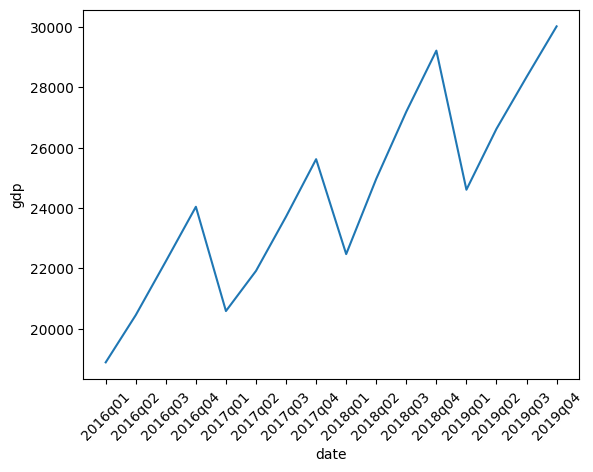

In [21]:
sns.lineplot(data=df, x="date", y="gdp")
plt.xticks(rotation=45)

In [22]:
# TODO:
# - implement EM to find loglik optimum
# - markov decision process
# - VARs themselves